In [1]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import win32file
win32file._setmaxstdio(2048)

In [59]:
# Load data
PER_data_folder = 'PER'
df = pd.read_csv(os.path.join(PER_data_folder, 'news_data_ckipner.csv'))
df = df.iloc[:10]

In [60]:
df.head(15)

,news,keywords,title,link,content,content_cn,NER_ckip,PER_ckip
0,appledaily,人口販運,台灣捲入跨國人口販運風暴｜蘋果新聞網｜蘋果日報,http://www.appledaily.com.tw/appledaily/articl...,《報導者》獨家授權記者╱《報導者》蔣宜婷、李雪莉 台北─柬埔寨報導台灣已捲入遠洋漁業的人口販...,《报导者》独家授权记者╱《报导者》蒋宜婷、李雪莉 台北─柬埔寨报导台湾已卷入远洋渔业的人口贩...,"{'ORG': ['報導者', '柬國法院', '美國國務院'], 'PERSON': ['...","['蔣宜婷', '李雪莉 ']"
1,appledaily,人口販運,​內政部：今年1到9月查緝人口販運被害人安置印尼人最多｜蘋果新聞網 ...,http://www.appledaily.com.tw/realtimenews/arti...,內政部公佈統計數據指出，今年1到9月司法及警察機關查緝人口販運案件共116件，75%為性剝削...,内政部公布统计数据指出，今年1到9月司法及警察机关查缉人口贩运案件共116件，75%为性剥削...,"{'ORG': ['內政部', '內政部'], 'DATE': ['今年1到9月', '今年...",['張文馨']
2,appledaily,人口販運,打擊人口販運台成立防制人口販運國際工作坊| 蘋果日報,http://www.appledaily.com.tw/realtimenews/arti...,內政部「2018防制人口販運國際工作坊」今（25）日盛大揭幕，邀請副總統陳建仁、美國在台協會...,内政部「2018防制人口贩运国际工作坊」今（25）日盛大揭幕，邀请副总统陈建仁、美国在台协会...,"{'ORG': ['內政部', '美國在台協會', '美國在台協會', '行政院', '內政...","['陳建仁', '谷立言', '陳建仁', '谷立言', '羅秉成', '徐國勇', 'Je..."
3,appledaily,人口販運,赴美留學成奴隸！洛城破獲大宗人口販賣｜蘋果新聞網｜蘋果日報https://,https://www.appledaily.com.tw/realtimenews/art...,（新增配音影片）洛縣人口販賣執行組周二宣佈，搗破一宗全國性人口販賣案，3日的掃蕩行動中拘捕5...,（新增配音影片）洛县人口贩卖执行组周二宣布，捣破一宗全国性人口贩卖案，3日的扫荡行动中拘捕5...,"{'DATE': ['3日', '1月25日', '2015年'], 'CARDINAL':...","['Manjusha Kulkarni', 'Mike Feuer', '伍國慶', 'Mi..."
4,appledaily,人口販運,美人口販運報告台列最佳等級、中國最差｜蘋果新聞網｜蘋果日報,http://www.appledaily.com.tw/realtimenews/arti...,美國國務院昨日公布年度人口販運問題報告，台灣連續第9年名列最佳第一級國家。中國則被列為人口販...,美国国务院昨日公布年度人口贩运问题报告，台湾连续第9年名列最佳第一级国家。中国则被列为人口贩...,"{'ORG': ['美國國務院', '中央社', '美國國務院', '美國之音', '國務院...","['史密斯', '龐皮歐']"
5,appledaily,人口販運,非典型人口販運怎麼查｜蘋果新聞網｜蘋果日報,http://www.appledaily.com.tw/realtimenews/arti...,陳禹先／婦女救援基金會研發部副組長自去年爆發嘉義市議員經營酒店，身為民意代表卻知法犯法，非法...,陈禹先／妇女救援基金会研发部副组长自去年爆发嘉义市议员经营酒店，身为民意代表却知法犯法，非法...,"{'PERSON': ['陳禹先', '泰皇'], 'ORG': ['婦女救援基金會研發部'...","['陳禹先', '泰皇']"
6,appledaily,人口販運,打擊人口販運法務部研議被害人遠距視訊| 蘋果日報,http://www.appledaily.com.tw/realtimenews/arti...,法務部上午在防制人口販運國際工作坊會議中報告「台灣防制人口販運起訴成效」，統計2011年到去...,法务部上午在防制人口贩运国际工作坊会议中报告「台湾防制人口贩运起诉成效」，统计2011年到去...,"{'ORG': ['法務部', '法務部', '法務部', '警政署刑事局', '法務部調查...",['徐珮君']
7,appledaily,人口販運,AIT也說讚！ 台灣打擊人口販運有世界級標準| 蘋果日報https://,https://www.appledaily.com.tw/realtimenews/art...,內政部長葉俊榮上午參加防制人口販運國際工作坊開幕典禮，他致詞時表示，美國國務院連續8年把台灣...,内政部长叶俊荣上午参加防制人口贩运国际工作坊开幕典礼，他致词时表示，美国国务院连续8年把台湾...,"{'ORG': ['內政部長', '美國國務院', '美國在台協會', 'AIT)', '國...","['葉俊榮', '傅德恩', '葉俊榮', '葉俊榮', '傅德恩', '傅德恩', '陳建..."
8,appledaily,人口販運,美人口販運報告​台連續5年列最佳| 蘋果日報,http://www.appledaily.com.tw/realtimenews/arti...,外交部晚間發布新聞稿表示，美國國務院在台北時間晚間發布「2014年人口販運報告」（2014 ...,外交部晚间发布新闻稿表示，美国国务院在台北时间晚间发布「2014年人口贩运报告」（2014 ...,"{'ORG': ['外交部', '國務院', '外交部', '內政部', '外交部'], '...",['陳培煌']
9,appledaily,人口販運,美人口販運防制報告台灣連8年第一級評等｜蘋果新聞網｜蘋果日報,http://www.appledaily.com.tw/realtimenews/arti...,美國國務院發布「2017年人口販運報告」（2017 Trafficking-in-Perso...,美国国务院发布「2017年人口贩运报告」（2017 Trafficking-in-Perso...,"{'ORG': ['美國國務院', '外交部', '宜蘭縣漁工職業工會', '美國務院', ...","['李麗華', '提勒森', '依凡卡', '陳培煌', '蔡英文']"


In [62]:
# Iterate through each news and store in dictionary
News_Dictionary = {}
Crime_All = set()
Person_All = set()

for index, row in df.iterrows():
    crime = row['keywords']
    Crime_All.add(crime)
    
    # person_list = row['PER'].split(',')
    
    """ ckipner """
    
    ckipner = row['PER_ckip']
    if type(ckipner) == str:
        person_list = ckipner[ckipner.find("[")+2: ckipner.find("]")-1].split("', '")
    else:
        person_list = []
    
    
    Person_All = Person_All.union(set(person_list))
    
    Crime_Person_list = person_list + [crime]
    News_Dictionary[str(index)] = list(set(Crime_Person_list))
    
# Create list with all crimes and people  
Crime_Person_All = Crime_All.union(Person_All)
Crime_Person_All = list(Crime_Person_All)    

print('News_Dictionary:', News_Dictionary, '\n')
print('Crime_Person_All:', Crime_Person_All)

News_Dictionary: {'0': ['蔣宜婷', '人口販運', '李雪莉 '], '1': ['人口販運', '張文馨'], '2': ['劉文淵', '谷立言', '徐國勇', '蔡', '陳建仁', 'Patrick Taran', '人口販運', 'Jean Bruggeman', '李麗芬', '吳玉琴', '羅秉成'], '3': ['伍國慶', 'Manjusha Kulkarni', '張紫茵', 'Stephanie', '人口販運', 'Michel', 'Mike Feuer'], '4': ['龐皮歐', '人口販運', '史密斯'], '5': ['陳禹先', '人口販運', '泰皇'], '6': ['人口販運', '徐珮君'], '7': ['葉俊榮', '徐珮君', '陳建仁', '傅德恩', '人口販運'], '8': ['陳培煌', '人口販運'], '9': ['陳培煌', '蔡英文', '提勒森', '依凡卡', '李麗華', '人口販運']} 

Crime_Person_All: ['劉文淵', '伍國慶', '張紫茵', '葉俊榮', '蔡英文', 'Stephanie', 'Jean Bruggeman', '羅秉成', '陳培煌', '谷立言', '陳禹先', '徐珮君', '傅德恩', '張文馨', '蔡', 'Mike Feuer', '泰皇', '李雪莉 ', 'Patrick Taran', '史密斯', '蔣宜婷', 'Manjusha Kulkarni', '徐國勇', '提勒森', '龐皮歐', '陳建仁', '依凡卡', '人口販運', '李麗華', 'Michel', '李麗芬', '吳玉琴']


In [64]:
# Set base df_co (co-occurance matrix)
df_co = pd.DataFrame(columns = Crime_Person_All, index = Crime_Person_All)
df_co[:] = 0

# iterate through each news and add one for each Crime_Person-Crime_Person relationship
#-> in this case, relationship equates to appearing in the same news
for value in News_Dictionary.values():
    for item1 in value:
        for item2 in value:
            df_co[item1][item2] += 1
            df_co[item2][item1] += 1

df_co.head(20)

,劉文淵,伍國慶,張紫茵,葉俊榮,蔡英文,Stephanie,Jean Bruggeman,羅秉成,陳培煌,谷立言,...,徐國勇,提勒森,龐皮歐,陳建仁,依凡卡,人口販運,李麗華,Michel,李麗芬,吳玉琴
劉文淵,2,0,0,0,0,0,2,2,0,2,...,2,0,0,2,0,2,0,0,2,2
伍國慶,0,2,2,0,0,2,0,0,0,0,...,0,0,0,0,0,2,0,2,0,0
張紫茵,0,2,2,0,0,2,0,0,0,0,...,0,0,0,0,0,2,0,2,0,0
葉俊榮,0,0,0,2,0,0,0,0,0,0,...,0,0,0,2,0,2,0,0,0,0
蔡英文,0,0,0,0,2,0,0,0,2,0,...,0,2,0,0,2,2,2,0,0,0
Stephanie,0,2,2,0,0,2,0,0,0,0,...,0,0,0,0,0,2,0,2,0,0
Jean Bruggeman,2,0,0,0,0,0,2,2,0,2,...,2,0,0,2,0,2,0,0,2,2
羅秉成,2,0,0,0,0,0,2,2,0,2,...,2,0,0,2,0,2,0,0,2,2
陳培煌,0,0,0,0,2,0,0,0,4,0,...,0,2,0,0,2,4,2,0,0,0
谷立言,2,0,0,0,0,0,2,2,0,2,...,2,0,0,2,0,2,0,0,2,2


In [65]:
# Add weights to edges
edge_list = []   # test networkx
for index, row in df_co.iterrows():
    i = 0
    for col in row:
        weight = float(col)     # Set weight - delete /464
        edge_list.append((index, df_co.columns[i], weight))
        i += 1

# Remove edge if 0.0
updated_edge_list = [x for x in edge_list if not x[2] == 0.0]

# Create duple of crime_or_person, occurance in news
node_list = []
for i in Crime_Person_All:
    for e in updated_edge_list:
        if i == e[0] and i == e[1]:
            node_list.append((i, e[2]))    # Set for the size of circles -  delete 6
            
max_occurrence = 0
for i in node_list:
    if i[1] == 0.0:
        node_list.remove(i)
    else:
        if i[1] > max_occurrence:
            max_occurrence = i[1]

# Remove self references
for i in updated_edge_list:
    if i[0] == i[1]:
        updated_edge_list.remove(i)
        
# print('edge_list', edge_list, '\n')
# print('updated_edge_list', updated_edge_list, '\n')
# print('node_list', node_list)

In [66]:
# Networkx graph time!
import matplotlib.font_manager as fm
Fond_path = r'C:\Windows\Fonts\kaiu.ttf'
fp1 = fm.FontProperties(fname = Fond_path)
nx.set_fontproperties(fp1)
G = nx.Graph()
# nx.draw(G, with_labels=True)

G = nx.Graph()
for i in sorted(node_list):
    G.add_node(i[0], size = i[1])
G.add_weighted_edges_from(updated_edge_list)

# Check data of graphs
# print('G.nodes', G.nodes(data = True), '\n')
# print('G.edges', G.edges(data = True))

# Listing out the order of nodes for future work
node_order = list(nx.nodes(G))

# Reorder node list
updated_node_list = []
for i in node_order:
    for x in node_list:
        if x[0] == i:
            updated_node_list.append(x)
            
# Reorder edge list - this was a pain
test = nx.get_edge_attributes(G, 'weight')
updated_again_edges = []
for i in nx.edges(G):
    for x in test.keys():
        if i[0] == x[0] and i[1] == x[1]:
            updated_again_edges.append(test[x])

# print('updated_node_list:', updated_node_list, '\n')
# print('updated_again_edges:', updated_again_edges)

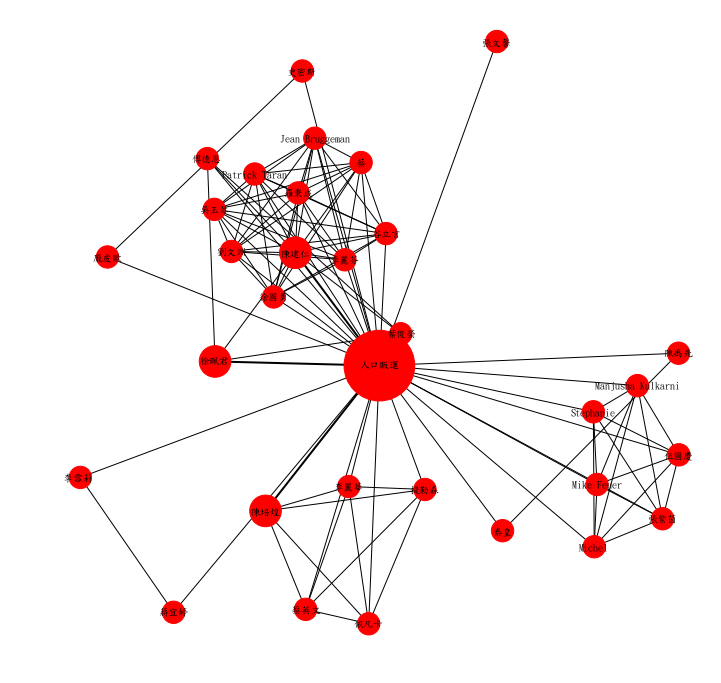

In [68]:
# Set canvas size
plt.subplots(figsize=(12,12))

# Drawing custimization
node_scalar = 5000/max_occurrence       # Set node_scalar
edge_scalar = 10/max_occurrence        # Set edge_scalar
sizes = [x[1]*node_scalar for x in updated_node_list]
widths = [x*edge_scalar for x in updated_again_edges]

# Draw the graph
pos = nx.spring_layout(G, k=0.42, iterations=17)

nx.draw(G, pos, with_labels=True, font_size = 8, font_weight = 'bold', 
        node_size = sizes, width = widths)


# Save as png
output_file = os.path.join('imgs', 'co-occurrence_diagram.png')   
k = 1
while(1):
    if not os.path.exists(output_file): 
        plt.axis('off')
        plt.savefig(output_file)
        break
    else:
        k += 1
        output_file = os.path.join('imgs', 'co-occurrence_diagram_' + str(k) + '.png') 

In [70]:
output_file = os.path.join('co-occurrence_csv', 'co-occurrence_matrix.csv')
k = 1
while(1):
    if not os.path.exists(output_file): 
        df_co.to_csv(output_file)
        break
    else:
        k += 1
        output_file = os.path.join('co-occurrence_csv', 'co-occurrence_matrix_' + str(k) + '.csv') 